# Iris classification problem
- In this case we only classify the Setosa specie. Using a binary classifier (Y/N)
- Setosa == 0, other species ==1;==2

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
session = tf.Session()

### Import and data manipulation

In [52]:
iris = datasets.load_iris()
#create a target array. Filling with 1 where a setosa specie es true(x=0), and with zero for the other species(x=1,x=2)
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
#I keep the 2 and 3 column of the dataset.. necesary to generate the prediction
iris_2d = np.array( [[x[2], x[3]] for x in iris.data])

### Variable declaration

In [53]:
batch_size = 20
x1_data = tf.placeholder(shape = [batch_size, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape = [batch_size, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

### Model creation
$$ y = Ax + b $$
$$ x_2 = Ax_1 + b \rightarrow x2 - Ax1 -b = 0 $$

In [54]:
A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [80]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_pred = tf.subtract(x1_data, my_add)

### Loss Function and back propagation

In [81]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_pred, labels = y_target)
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = my_optimizer.minimize(xentropy)

### Variable init.

In [82]:
init = tf.global_variables_initializer()
session.run(init)

## Model training

In [83]:
for i in range(1000):
    rand_idx = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_idx]])
    session.run(train_step, feed_dict={x1_data:rand_x1, x2_data:rand_x2, y_target:rand_y})
    if(i+1)%100==0:
        print('Paso #'+str(i+1)+", A="+str(session.run(A))+", b ="+str(session.run(b)))

Paso #100, A=[[7.33103]], b =[[-2.4139388]]
Paso #200, A=[[8.684222]], b =[[-3.5308084]]
Paso #300, A=[[9.512531]], b =[[-4.267126]]
Paso #400, A=[[10.193211]], b =[[-4.7043505]]
Paso #500, A=[[10.727861]], b =[[-5.0798445]]
Paso #600, A=[[11.139025]], b =[[-5.4005313]]
Paso #700, A=[[11.536513]], b =[[-5.6948996]]
Paso #800, A=[[11.877265]], b =[[-5.9323816]]
Paso #900, A=[[12.159236]], b =[[-6.1854563]]
Paso #1000, A=[[12.406979]], b =[[-6.413247]]


### Trained Model

In [84]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

### Regression plot

In [85]:
x = np.linspace(0, 3, num = 100)
abline_values = []
for i in x:
    abline_values.append(slope*i+intercept)
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i]==1]

no_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i]==0]
no_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i]==0]

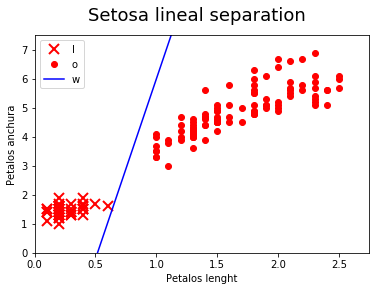

In [90]:
plt.plot(setosa_x, setosa_y, 'rx',ms =10, mew =2, label = 'setosa')
plt.plot(no_setosa_x, no_setosa_y, 'ro', label = 'No setosa')
plt.plot(x, abline_values, 'b-')
plt.suptitle('Setosa lineal separation', fontsize = 18)
plt.xlabel('Petalos lenght')
plt.ylabel('Petalos anchura')
plt.legend('lower right')
plt.xlim([0,2.75])
plt.ylim([0,7.5])
plt.show()